Blog Feedback Problem
NAME-ANNU
ROLL_NO.-EE21RESCH01010

Link to Dataset
http://archive.ics.uci.edu/ml/datasets/BlogFeedback

Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Functions declaration
    
def closed_form_solution(X,y):
    '''Closed form solution for linear regression'''
    return np.linalg.pinv(X).T@y.T


def polynomial_design_matrix(x, powers, bias=True):
    Phi = np.column_stack((x ** p for p in powers))
    if bias:
        r, _ = Phi.shape
        onevect = np.ones(r)
        Phi = np.column_stack((onevect, Phi))
    return Phi
def with_bias(x,N):
    one_array=np.ones((1,N))
    return np.vstack((one_array,x))
def poly_matrix(x,M):
    if(m==0):
        poly_kernel=np.ones((1,x.shape[1]))
    else:
        poly_kernel=with_bias(x,x.shape[1])
        for i in range(2,M+1):
            poly_kernel=np.vstack((poly_kernel,x**i))
    return poly_kernel

In [3]:
features=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
        '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
        '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
        '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
        '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
        '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
        '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
        '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
        '90', '91', '92', '93', '94', '95', '96', '97', '98', '99',
        '100', '101', '102', '103', '104', '105', '106', '107', '108',
        '109', '110', '111', '112', '113', '114', '115', '116', '117',
        '118', '119', '120', '121', '122', '123', '124', '125', '126',
        '127', '128', '129', '130', '131', '132', '133', '134', '135',
        '136', '137', '138', '139', '140', '141', '142', '143', '144',
        '145', '146', '147', '148', '149', '150', '151', '152', '153',
        '154', '155', '156', '157', '158', '159', '160', '161', '162',
        '163', '164', '165', '166', '167', '168', '169', '170', '171',
        '172', '173', '174', '175', '176', '177', '178', '179', '180',
        '181', '182', '183', '184', '185', '186', '187', '188', '189',
        '190', '191', '192', '193', '194', '195', '196', '197', '198',
        '199', '200', '201', '202', '203', '204', '205', '206', '207',
        '208', '209', '210', '211', '212', '213', '214', '215', '216',
        '217', '218', '219', '220', '221', '222', '223', '224', '225',
        '226', '227', '228', '229', '230', '231', '232', '233', '234',
        '235', '236', '237', '238', '239', '240', '241', '242', '243',
        '244', '245', '246', '247', '248', '249', '250', '251', '252',
        '253', '254', '255', '256', '257', '258', '259', '260', '261',
        '262', '263', '264', '265', '266', '267', '268', '269', '270',
        '271', '272', '273', '274', '275', '276', '277', '278', '279',
        '280','target']

In [5]:
raw_dataset=pd.read_csv('/content/blogData_train.csv',names=features,na_values="?",sep=",")
dataset = raw_dataset.copy()

print(dataset.shape)

dataset.describe()

(52397, 281)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,target
count,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.0,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.0,52397.000000,52397.000000,52397.000000,52397.000000,52397.0,52397.000000,52397.000000,...,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.00000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.0,52397.000000,52397.000000,52397.000000
mean,39.444167,46.806717,0.358914,339.853102,24.681661,15.214611,27.959159,0.002748,258.666030,5.829151,14.053114,28.114936,0.0,256.865145,3.639674,34.898467,41.610585,0.358914,286.265569,21.931008,1.161498,39.375051,-226.825047,252.386549,-0.467164,0.501345,0.778465,0.002195,5.537531,0.279176,0.191614,0.486134,0.0,4.387637,0.019257,0.179896,0.481069,0.0,4.372483,0.000401,...,0.014466,0.000076,0.000134,0.020516,0.638300,0.123366,0.216768,0.00771,0.000076,0.015115,0.006393,0.000191,0.025956,0.014676,0.000248,0.042044,0.002290,0.003435,0.002615,0.008455,0.000305,0.113919,0.115808,0.138100,0.165296,0.167758,0.161650,0.137470,0.159227,0.167681,0.171327,0.162242,0.154455,0.096151,0.088917,0.119167,0.0,1.242094,0.769505,6.764719
std,79.121821,62.359996,6.840717,441.430109,69.598976,32.251189,38.584013,0.131903,321.348052,23.768317,28.664559,39.619195,0.0,320.364454,14.584109,66.923819,52.831047,6.840717,374.371147,61.383375,3.973923,56.862283,269.067040,319.113550,3.332347,0.960882,0.955727,0.075003,6.989038,0.861055,0.359482,0.635827,0.0,5.266506,0.136906,0.341918,0.640526,0.0,5.276613,0.017741,...,0.119405,0.008737,0.011558,0.141760,0.480497,0.328860,0.412047,0.08747,0.008737,0.122013,0.079704,0.013814,0.159005,0.120255,0.015750,0.200692,0.047802,0.058511,0.051067,0.091561,0.017472,0.317716,0.319998,0.345008,0.371451,0.373655,0.368133,0.344346,0.365891,0.373587,0.376798,0.368676,0.361388,0.294800,0.284627,1.438194,0.0,27.497979,20.338052,37.706565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.666667,0.000000,-1256.000000,0.000000,-138.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.285714,5.214318,0.000000,29.000000,0.000000,0.891566,3.075076,0.000000,22.000000,0.000000,0.775000,3.044565,0.0,22.000000,0.000000,1.824588,4.528968,0.000000,21.000000,0.000000,0.057971,4.087037,-369.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [6]:
dataset.head(3)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,target
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,14.044226,32.615417,0.0,377.0,2.0,34.567566,48.475178,0.0,378.0,12.0,1.479934,46.18691,-356.0,377.0,0.0,1.076167,1.795416,0.0,11.0,0.0,0.400491,1.078097,0.0,9.0,0.0,0.377559,1.07421,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,14.044226,32.615417,0.0,377.0,2.0,34.567566,48.475178,0.0,378.0,12.0,1.479934,46.18691,-356.0,377.0,0.0,1.076167,1.795416,0.0,11.0,0.0,0.400491,1.078097,0.0,9.0,0.0,0.377559,1.07421,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,14.044226,32.615417,0.0,377.0,2.0,34.567566,48.475178,0.0,378.0,12.0,1.479934,46.18691,-356.0,377.0,0.0,1.076167,1.795416,0.0,11.0,0.0,0.400491,1.078097,0.0,9.0,0.0,0.377559,1.07421,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Checking the presence of NA values and dropping them
dataset.isna().sum()

1         0
2         0
3         0
4         0
5         0
         ..
277       0
278       0
279       0
280       0
target    0
Length: 281, dtype: int64

In [8]:
dataset=dataset.dropna() #dropping NA values

In [9]:
correlation_mat=dataset.corr() #FINDING CORRELATION
correlation_mat.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,target
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,0.0,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,0.0,277.000000,277.000000,277.000000,277.000000,0.0,277.000000,277.000000,...,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,0.0,277.000000,277.000000,277.000000
mean,0.133759,0.132529,0.018122,0.122295,0.126265,0.132342,0.131561,0.013787,0.107886,0.117395,0.133034,0.132242,NaN,0.107941,0.115672,0.133654,0.128670,0.018122,0.111401,0.125657,0.114457,0.132042,-0.094950,0.107707,-0.027009,0.108806,0.090185,0.013297,0.072057,0.111317,0.110119,0.096624,NaN,0.066844,0.105384,0.109990,0.096949,NaN,0.066898,0.011394,...,0.036541,0.200968,0.153875,0.033844,0.087207,0.052095,0.072129,0.033920,0.200968,0.029973,0.037856,0.129787,0.040658,0.038080,0.114570,0.042271,0.046312,0.043404,0.042852,0.039471,0.103637,-0.001129,-0.000223,0.000022,-0.000094,0.001312,0.001036,-0.001203,0.001590,0.000644,0.003267,-0.001569,-0.000163,-0.002168,-0.002729,0.004183,NaN,0.008273,0.008368,0.067746
std,0.274055,0.272649,0.102704,0.255896,0.257884,0.274276,0.277951,0.091564,0.249345,0.247112,0.274715,0.278830,NaN,0.249335,0.240696,0.273496,0.264134,0.102704,0.241670,0.258042,0.246785,0.278910,0.229839,0.248002,0.082817,0.275546,0.266871,0.093554,0.258128,0.260068,0.277206,0.271664,NaN,0.252751,0.235370,0.277498,0.272245,NaN,0.252775,0.078181,...,0.068582,0.300804,0.231615,0.065906,0.144411,0.086389,0.102041,0.068616,0.300804,0.067542,0.065966,0.196494,0.067163,0.071999,0.174808,0.075410,0.078897,0.072658,0.076333,0.064797,0.159279,0.071952,0.071981,0.071989,0.071906,0.071958,0.071907,0.072018,0.073896,0.073139,0.072770,0.072788,0.073614,0.070275,0.069970,0.061394,NaN,0.081037,0.080944,0.146357
min,-0.721287,-0.823586,-0.060933,-0.892489,-0.619366,-0.692541,-0.838444,-0.215008,-0.970233,-0.481833,-0.712583,-0.831996,NaN,-0.970727,-0.488433,-0.748403,-0.845815,-0.060933,-0.914384,-0.631960,-0.480476,-0.835565,-0.970727,-0.968491,-0.327167,-0.749421,-0.900023,-0.045609,-0.956948,-0.616351,-0.761690,-0.876211,NaN,-0.991953,-0.441117,-0.759145,-0.875718,NaN,-0.992312,-0.012516,...,-0.060816,-0.007280,-0.005087,-0.040731,-0.218695,-0.074545,-0.074466,-0.019405,-0.007280,-0.042684,-0.004598,-0.011511,-0.018507,-0.069073,-0.011054,-0.089202,-0.018538,-0.018428,-0.019807,-0.021391,-0.007986,-0.163035,-0.164557,-0.179715,-0.199793,-0.199793,-0.197148,-0.179239,-0.197874,-0.204088,-0.204088,-0.200098,-0.194336,-0.148303,-0.142048,-0.028629,NaN,-0.028277,-0.020524,-0.280792
25%,0.006433,0.008919,-0.004017,0.008304,0.006440,0.005436,0.005898,-0.001686,0.003008,0.002584,0.006188,0.006214,NaN,0.002995,0.003456,0.007173,0.008947,-0.004017,0.007303,0.006361,0.000849,0.005408,-0.044817,0.003055,-0.043690,-0.010279,-0.018999,-0.002667,-0.028833,-0.005880,-0.009939,-0.017489,NaN,-0.033553,-0.002948,-0.010124,-0.017225,NaN,-0.033665,-0.002911,...,0.006602,0.007884,0.005059,0.007970,0.008814,0.012561,0.016609,0.005538,0.007884,0.001062,0.011995,0.005564,0.015378,0.009721,0.003891,0.012841,0.005969,0.004228,0.005795,0.016053,0.003476,-0.004237,-0.004183,-0.003498,-0.003888,-0.001779,-0.002287,-0.003937,-0.004153,-0.00543

In [10]:
#FEATURE EXTRACTION 

#Selecting only those features which have correlation value greater than or equal to 0.4
cor_target=correlation_mat['target']
cor_target=cor_target[cor_target>=0.4]
cor_target[cor_target>=0.4]

1         0.485464
2         0.424616
5         0.491707
6         0.497631
7         0.433578
10        0.506540
11        0.490111
12        0.439152
15        0.489674
16        0.471999
20        0.486316
21        0.503375
22        0.440003
35        0.461627
52        0.472061
target    1.000000
Name: target, dtype: float64

In [11]:
drop_list=['3', '4', '8', '9', 
        '13', '14', '17', '18', '19', '23',
        '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
        '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
        '46', '47', '48', '49', '50', '51','53', '54', '55', '56',
        '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
        '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
        '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
        '90', '91', '92', '93', '94', '95', '96', '97', '98', '99',
        '100', '101', '102', '103', '104', '105', '106', '107', '108',
        '109', '110', '111', '112', '113', '114', '115', '116', '117',
        '118', '119', '120', '121', '122', '123', '124', '125', '126',
        '127', '128', '129', '130', '131', '132', '133', '134', '135',
        '136', '137', '138', '139', '140', '141', '142', '143', '144',
        '145', '146', '147', '148', '149', '150', '151', '152', '153',
        '154', '155', '156', '157', '158', '159', '160', '161', '162',
        '163', '164', '165', '166', '167', '168', '169', '170', '171',
        '172', '173', '174', '175', '176', '177', '178', '179', '180',
        '181', '182', '183', '184', '185', '186', '187', '188', '189',
        '190', '191', '192', '193', '194', '195', '196', '197', '198',
        '199', '200', '201', '202', '203', '204', '205', '206', '207',
        '208', '209', '210', '211', '212', '213', '214', '215', '216',
        '217', '218', '219', '220', '221', '222', '223', '224', '225',
        '226', '227', '228', '229', '230', '231', '232', '233', '234',
        '235', '236', '237', '238', '239', '240', '241', '242', '243',
        '244', '245', '246', '247', '248', '249', '250', '251', '252',
        '253', '254', '255', '256', '257', '258', '259', '260', '261',
        '262', '263', '264', '265', '266', '267', '268', '269', '270',
        '271', '272', '273', '274', '275', '276', '277', '278', '279',
        '280']

In [12]:
modified_dataset=dataset.drop(drop_list,axis=1)
#modified_dataset.head()
modified_dataset.shape

(52397, 16)

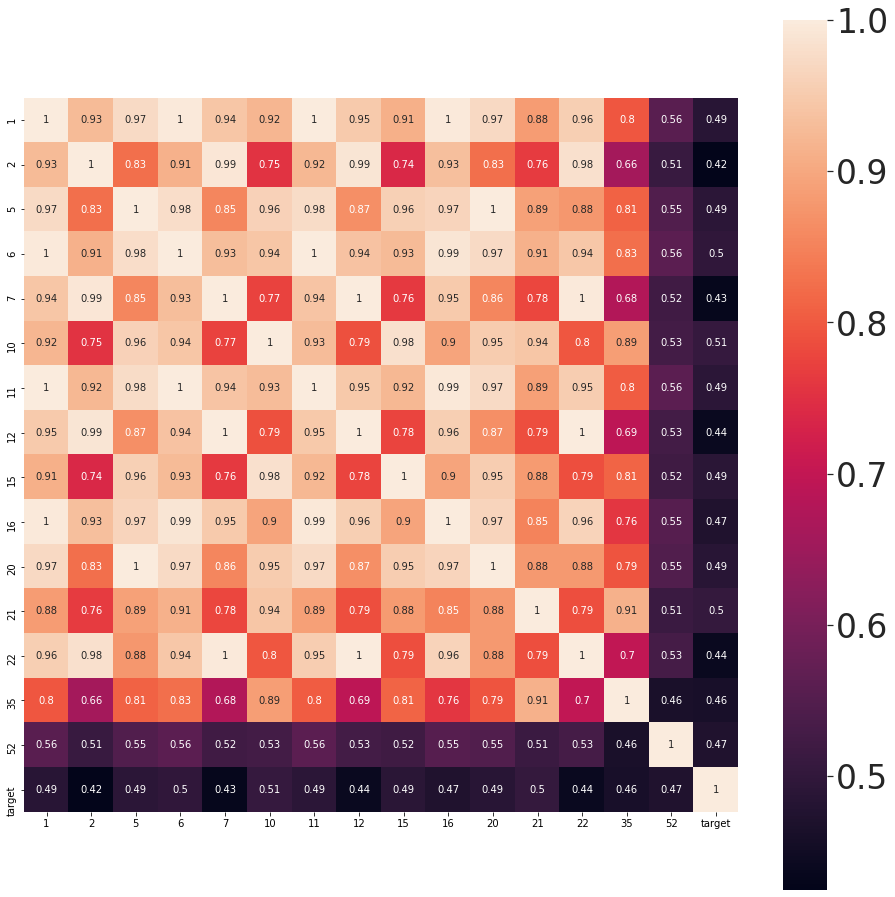

In [13]:
#Checking whether these attributes are correlated with each other or not
#To check correlation between attributes we can visualize it from heat map
#lighter ones => high correlation
#darker ones => lower correlation
fig=plt.subplots(figsize=(16,16))
sns.set(font_scale=3)
sns.heatmap(modified_dataset.corr(),square=True,cbar=True,annot=True,annot_kws={'size': 10})

USING POLYNOMIAL KERNEL,PERFORMING LINEAR REGRESSION,WE GET

blog Predictions with split factor =0.2 [8.50062029e+00 8.50062029e+00 8.50062029e+00 ... 7.73326808e-42
 7.73326808e-42 7.73326808e-42]
Minimum error occurs for M = 5 and its values is  24.28492502133299


Text(0, 0.5, 'rms')

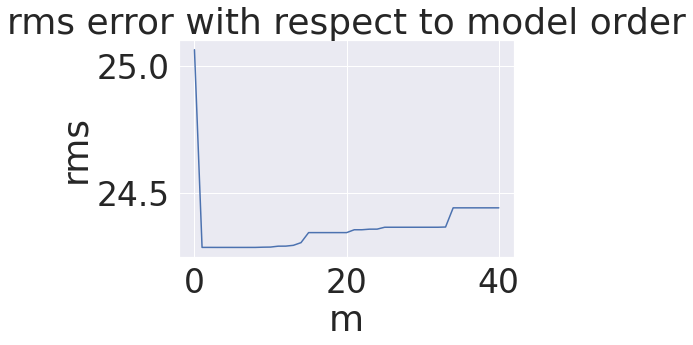

In [14]:
#Linear Regression with splitting factor =0.2 ,with only considering greater than 0.4 values
data=modified_dataset.to_numpy()
x=data[:,0:14].T
x=x.astype(float)
t=data[:,15].T
t=t.astype(float)

p=0.2
Xtr=x[:,0:int(p*x.shape[1])]
Ytr=t[0:int(p*x.shape[1])]

M=40
err=np.array([])
pred=[]
for m in range(M+1):
    phi=poly_matrix(Xtr,m)
    weight_vector=closed_form_solution(phi,Ytr)
    y=weight_vector.T@phi
    pred=np.append(pred,y)
    err=np.append(err,np.sqrt(sum(((y-Ytr)**2))/(len(y))))
print("blog Predictions with split factor =0.2",pred)
m_value=np.argmin(err)
min_err=err[m_value]
print("Minimum error occurs for M =",m_value,"and its values is ",min_err)
plt.figure()
plt.plot(err)
plt.title("rms error with respect to model order")
plt.xlabel("m")
plt.ylabel("rms")

Minimum error occurs for M = 3 and its values is  20.812006586170334


Text(0, 0.5, 'rms')

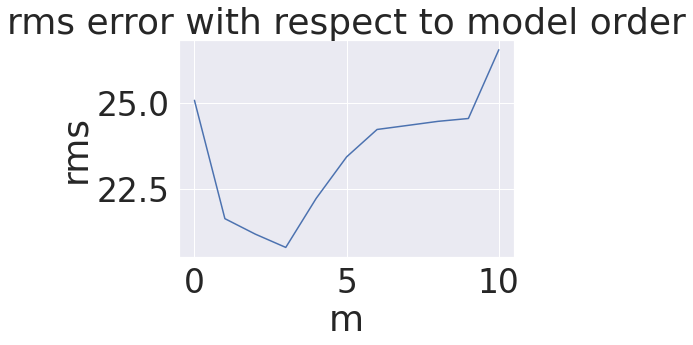

In [15]:
#Linear Regression with splitting factor =0.2,all data sets
data=dataset.to_numpy()
x=data[:,0:279].T
x=x.astype(float)
t=data[:,280].T
t=t.astype(float)

p=0.2
Xtr=x[:,0:int(p*x.shape[1])]
Ytr=t[0:int(p*x.shape[1])]
M=10
err=np.array([])
for m in range(M+1):
    phi=poly_matrix(Xtr,m)
    weight_vector=closed_form_solution(phi,Ytr)
    y=weight_vector.T@phi
    
    err=np.append(err,np.sqrt(sum(((y-Ytr)**2))/(len(y))))

m_value=np.argmin(err)
min_err=err[m_value]
print("Minimum error occurs for M =",m_value,"and its values is ",min_err)
plt.figure()
plt.plot(err)
plt.title("rms error with respect to model order")
plt.xlabel("m")
plt.ylabel("rms")

In [ ]:
#WITH ALL DATA SETS,NOT RESTRICTING TARGET VALUE GREATER THAN 0.4
#Linear Regression with splitting factor =0.2
data=dataset.to_numpy()
x=data[:,0:279].T

x=x.astype(float)
t1=data[:,280]
t=data[:,280].T
t=t.astype(float)

p=0.2 #SPLIT FACTOR
Xtr=x[:,0:int(p*x.shape[1])]
Ytr=t[0:int(p*x.shape[1])]
M=40
err=np.array([])
for m in range(M+1):
    phi=poly_matrix(Xtr,m)
    weight_vector=closed_form_solution(phi,Ytr)
    y=weight_vector.T@phi
    
    err=np.append(err,np.sqrt(sum(((y-Ytr)**2))/(len(y))))

m_value=np.argmin(err)
min_err=err[m_value]
print("Minimum error occurs for M =",m_value,"and its values is ",min_err)
plt.figure()
plt.plot(err)
plt.title("rms error with respect to model order")
plt.xlabel("m")
plt.ylabel("rms")

Minimum error occurs for M = 5 and its values is  9.521152762056861


Text(0, 0.5, 'rms')

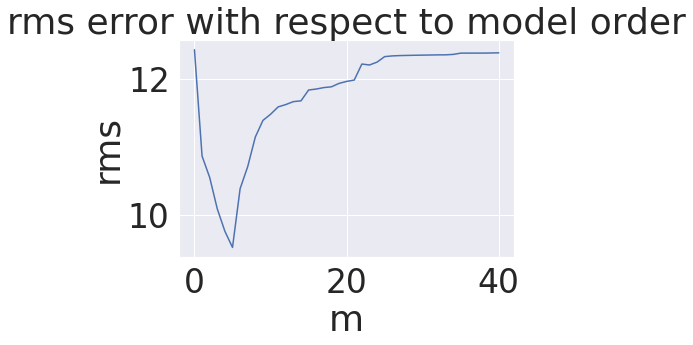

In [39]:
#Linear Regression with splitting factor =0.02
data=dataset.to_numpy()
x=data[:,0:279].T
x=x.astype(float)
t=data[:,280].T
t=t.astype(float)

p=0.02 #SPLIT FACTOR
Xtr=x[:,0:int(p*x.shape[1])]
Ytr=t[0:int(p*x.shape[1])]
M=40
err=np.array([])
for m in range(M+1):
    phi=poly_matrix(Xtr,m)
    weight_vector=closed_form_solution(phi,Ytr)
    y=weight_vector.T@phi
    
    err=np.append(err,np.sqrt(sum(((y-Ytr)**2))/(len(y))))

m_value=np.argmin(err)
min_err=err[m_value]
print("Minimum error occurs for M =",m_value,"and its values is ",min_err)
plt.figure()
plt.plot(err)
plt.title("rms error with respect to model order")
plt.xlabel("m")
plt.ylabel("rms")

Minimum error occurs for M = 5 and its values is  9.521152762056861


Text(0, 0.5, 'rms')

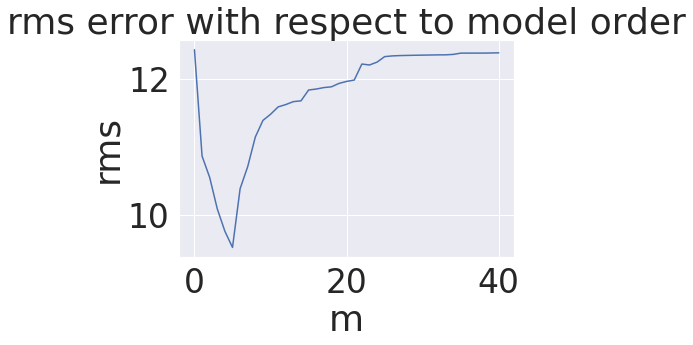

In [40]:
#Linear Regression with splitting factor =0.001
data=dataset.to_numpy()
x=data[:,0:279].T
x=x.astype(float)
t=data[:,280].T
t=t.astype(float)

p=0.02
Xtr=x[:,0:int(p*x.shape[1])]
Ytr=t[0:int(p*x.shape[1])]
M=40
err=np.array([])
for m in range(M+1):
    phi=poly_matrix(Xtr,m)
    weight_vector=closed_form_solution(phi,Ytr)
    y=weight_vector.T@phi
    
    err=np.append(err,np.sqrt(sum(((y-Ytr)**2))/(len(y))))

m_value=np.argmin(err)
min_err=err[m_value]
print("Minimum error occurs for M =",m_value,"and its values is ",min_err)
plt.figure()
plt.plot(err)
plt.title("rms error with respect to model order")
plt.xlabel("m")
plt.ylabel("rms")

Minimum error occurs for M = 2 and its values is  4.6296643563021514e-09


Text(0, 0.5, 'rms')

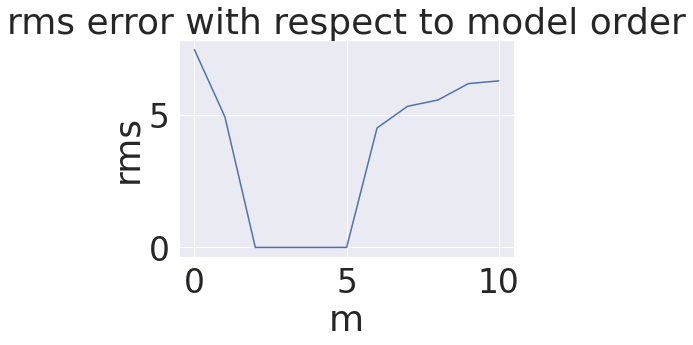

In [16]:
#Linear Regression with splitting factor =0.001
data=dataset.to_numpy()
x=data[:,0:279].T
x=x.astype(float)
t=data[:,280].T
t=t.astype(float)

p=0.001
Xtr=x[:,0:int(p*x.shape[1])]
Ytr=t[0:int(p*x.shape[1])]
M=10
err=np.array([])
pred=[]
for m in range(M+1):
    phi=poly_matrix(Xtr,m)
    weight_vector=closed_form_solution(phi,Ytr)
    y=weight_vector.T@phi
    pred=np.append(pred,y)
    err=np.append(err,np.sqrt(sum(((y-Ytr)**2))/(len(y))))

print("blog predicted value is given by",pred)
m_value=np.argmin(err)
min_err=err[m_value]
print("Minimum error occurs for M =",m_value,"and its values is ",min_err)
plt.figure()
plt.plot(err)
plt.title("rms error with respect to model order")
plt.xlabel("m")
plt.ylabel("rms")


#ERROR IS MINIMUM HERE,SO THIS MODEL IS BEST WITH ALL DATA POINTS

In [19]:
# linear regression using "stochastic" gradient descent 
# function to compute hypothesis / predictions 
def hypothesis(X, theta): 
    return np.dot(X, theta) 
  
# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta): 
    h = hypothesis(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 
  
# function to compute the error for current values of theta 
def cost(X, y, theta): 
    h = hypothesis(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 
  
# function to create a list containing various-batches 
def create_diff_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
# function to perform batch gradient descent #By default,batch size is 32
def gradientDescent(X, y, learning_rate = 0.001, batch_size = 32): 
    t=X.reshape(2,-1)
    theta = np.zeros((t.shape[1], 1)) 
    error_list = [] 
    max_iters = 100
    for itr in range(max_iters): 
        mini_batches = create_diff_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta)) 
    return theta, error_list


data=modified_dataset.to_numpy()
x=data[:,0:14].T
x=x.astype(float)
t=data[:,15].T
t=t.astype(float)

p=0.02
Xtr=x[:,0:int(p*x.shape[1])]
Ytr=t[0:int(p*x.shape[1])]
W,ERROR_LIST=gradientDescent(Xtr.ravel(),Ytr,learning_rate = 0.001, batch_size = 32)

IndexError: ignored